<h1>Приближенное решение уравнения ${f(x) = 0}$ методом деления отрезка пополам</h1>
<h2>Описание метода</h2>

Для работы метода нам нужно знать отрезок [a, b], такой что выполняется теорема Больцано-Коши $f(a) * f(b) < 0$ . В таком случае на этом отрезке $\exists c: f(c) = 0, c \in (a, b)$. Мы будем строить последовательность отрезков $\{[a_n, b_n] : [a_n, b_n] \subset [a_{n-1}, b_{n-1}] \subset [a, b]\}$, на концах которой функция принимает значения разных знаков. На каждом шаге итерации мы вычисляем значение $\xi = \frac{a_n + b_n}{2}$ и значение функции $f(\xi)$ в этой точке. После мы проверяем является ли $\xi$ корнем нашего уравнения и если не является то мы добавляем в нашу последовательность отрезков один из отрезков $[a_n, \xi]$ или $[\xi, b_n]$ (выбираем из них тот на концах которого функция имеет разные знаки)

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import optimize 



${f(x) = ln{ln(x)}-e^{-x^2}}$

In [3]:
f = lambda x: np.log(np.log(x))-np.exp(-x**2)

Строим график для визуального определения отрезка

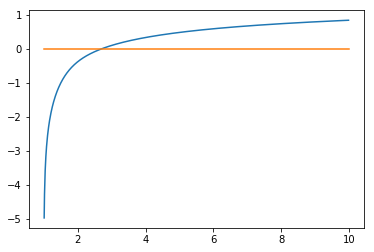

In [4]:
x = np.arange(1.01, 10, 0.01)
plt.plot(x, f(x), x, np.zeros(len(x)))
plt.show()

In [5]:
def bisect(f,a,b,eps):
    k=0
    psi = (b+a)/2
    an = a
    bn = b
    while (bn - an > 2 * eps) and (f(psi)!=0):
        psi = (bn + an) / 2
        if f(bn)*f(psi)<0:
            an = psi
        else:
            bn = psi
        k += 1
    return psi, k

Мой ответ

In [6]:
my_ans, k = bisect(f, 2.0, 6.0, 1e-6)
my_ans, k

(2.7199459075927734, 21)

Ответ, полученный встроенными методами языка

In [31]:
scipy_ans = optimize.root_scalar(f, bracket=[2.0, 6.0], method='bisect').root
scipy_ans

2.719947541330839

Разница ответов

In [32]:
scipy_ans-my_ans

1.6337380657205358e-06